# How To Run Instructions

Start by loading all dependencies. The implementation features a data loader for most of the graphs used in the original paper.

In [1]:
# Load SpectralMix
from data_utils import DataLoader
from spectral_mix import SpectralMix
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

If we want to use of one of these datasets, we simply have to call `load_dataset(dataset_name)`. A list with the identifiers is given below.

In [2]:
# Load a predefined dataset
datasets = ['acm', 'dblp', 'flickr', 'imdb']
dataset_name = datasets[0]

dl = DataLoader()
dataset = dl.load_dataset(dataset_name)

Each dataset has an adjacency matrix and the true labels of the vertices. Some of them also have an attribute matrix. Even if the dataset does not have an attribute matrix, you can give an empty one to SpectralMix. It handles this case accordingly.

In [3]:
adjacency_matrix = dataset['adjacency_matrix']
attribute_matrix = dataset['attribute_matrix']
true_labels = dataset['true_labels']

Next, we simply have to instantiate spectral mix.

In [4]:
spectral_mix = SpectralMix(d=7, n_clusters=7)

The only parameters SpectralMix needs are the dimension the graph should be reduced to, denoted by `d` and the number of clusters `k`. Note that the latter is not needed for SpectralMix directly, it is used only in clustering after. Clustering is performed using k-Means.

In [ ]:
spectral_mix = spectral_mix.fit(adjacency_matrix=adjacency_matrix, attribute_matrix=attribute_matrix)

Calling `fit()` will perform the dimensionality reduction. The function `predict()` can be used to make predictions.

You can also use other matrices of course, the impelemntation expects adjacency matrices to be tensors of size $n \times n \times r$, where each $n$ corresponds to one vertex and the graph consists of $r$ relations. The attribute matrix shall be of size $n \times m$, where m is the number of attributes. The attribute matrix can also be `None` for graphs without attributes. 

In [16]:
import numpy as np

def generate_adjacency_matrix(n_clusters, cluster_size):
    matrix_size = n_clusters * cluster_size
    adjacency_matrix = np.zeros((matrix_size, matrix_size))
    
    for i in range(n_clusters):
        start = i * cluster_size
        end = start + cluster_size
        
        block = np.random.randint(2, size=(cluster_size, cluster_size))
        np.fill_diagonal(block, 0)
        adjacency_matrix[start:end, start:end] = block

    # Symmetrize the block
    adjacency_matrix = np.triu(adjacency_matrix)
    adjacency_matrix = adjacency_matrix + adjacency_matrix.T

    adjacency_matrix[matrix_size - 1, 0] = 1
    adjacency_matrix[0, matrix_size - 1] = 1

    return adjacency_matrix.reshape((matrix_size, matrix_size, 1))

n_clusters = 2
cluster_size = 10
adjacency_matrix = generate_adjacency_matrix(n_clusters, cluster_size)

random_attribute_matrix = np.random.randint(2, size=(cluster_size * n_clusters, 5))

In [17]:
sm = SpectralMix(d=2, n_clusters=2)

In [18]:
labels = sm.fit_predict(adjacency_matrix=adjacency_matrix, attribute_matrix=random_attribute_matrix)
o = sm.o

100%|██████████| 50/50 [00:00<00:00, 3748.93it/s]


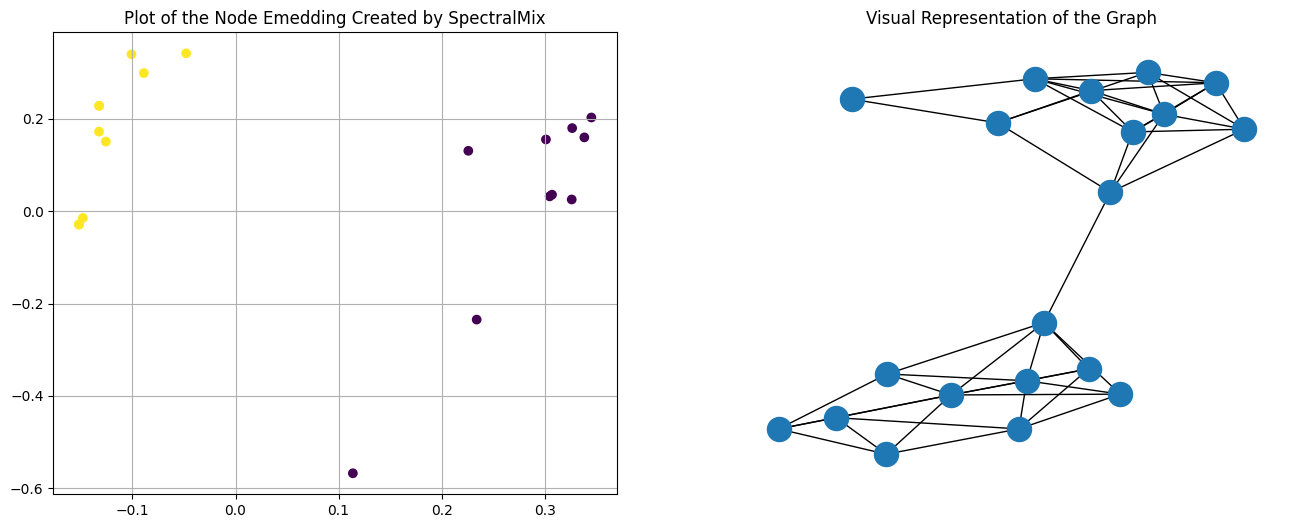

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].scatter(o[:, 0], o[:, 1], c=labels)
g = nx.from_numpy_array(adjacency_matrix[:, :, 0])
nx.draw(g, ax=ax[1])

ax[0].set_title('Plot of the Node Emedding Created by SpectralMix')
ax[1].set_title('Visual Representation of the Graph')

ax[0].grid()

plt.show()